# An Introduction to HyperSpy:
## The multi-dimensional data analysis toolbox

### <br/>
### Josh Taillon and Andy Herzing
#### *April 5, 2018*

## <a id='top'></a> Outline

1. <a href='#intro'> Intro</a>
2. <a href='#starting'> Getting Started</a>
2. <a href='#signal'> The Signal Class</a>
3. <a href='#io'> Input/Output</a>
4. <a href='#EM'> Electron Microscopy Tools</a>
5. <a href='#EDS'> EDS Processing</a>
6. <a href='#EELS'> EELS Processing</a>
7. <a href='#extending'> Extensibility</a>
8. <a href='#demos'> Interactive Demos</a>

# Notes for before presentation:
* Open separate instances of the following (all in `hyperspy` conda env):
    * Jupyter QtConsole
    * HyperSpyUI
    * JupyterLab
    * Jupyter Notebook
    * Spyder (with `./examples/analysis_script.py` open)
    * Plain anaconda console in `./examples/` directory
    

#### Import hyperspy

In [1]:
%matplotlib nbagg
import hyperspy.api as hs
import numpy as np

#### Disable warnings for presentation:

In [2]:
import logging
hs_logger = logging.getLogger('hyperspy') 
hs_logger.setLevel(logging.ERROR)

## A quick note first:

## This isn't your parents' Powerpoint...

## ...because everything is interactive!

In [3]:
import datetime
import time
datestring = datetime.datetime.now().strftime('%B %d, %Y')
for c in 'Today is {}!'.format(datestring):
    print(c, end='')
    time.sleep(.1)

Today is April 05, 2018!

## Made possible with:

* Jupyter notebook &mdash; https://jupyter.org/

* RISE (Reveal.js IPython/Jupyter Slideshow Extension) &mdash; https://github.com/damianavila/RISE

# <a id='intro'></a> Introduction

<a href="#top"><i class="fa-home fa" style="opacity:0.6;"></i></a>

## What is HyperSpy?

* Open-source Python library for interactive data analysis of multi-dimensional datasets

* Makes it easy to operate on multi-dimensional arrays as you would a single spectrum (or image)

* Easy access to cutting-edge signal processing tools 

* Modular structure makes it easy to add custom features

## Why &nbsp; <img src="img/python_logo.svg" width=300px style="display: inline-block;">?

<center><img src="img/xkcd_python.png" width=600px></center>

## Why &nbsp; <img src="img/python_logo.svg" width=300px style="display: inline-block;">?

* Quickly becoming the *de facto* standard of scientific computing

* Free (as in speech and as in beer)
    * No pesky licenses to checkout

* Vast array of scientific libraries available:
    * `pip install antigravity`

* Thanks to `numpy` and other libraries, similar (or often better) performance than MATLAB

## History of HyperSpy

* Developed by [Francisco de la Peña](https://scholar.google.com/citations?user=5n2c_fYAAAAJ&hl=en) in 2007 &mdash; 2012 as part of Ph.D. Thesis

* Originally called EELSLab:

<center><img src="img/eelslab.png" width=500px></center>

* Open-sourced (on [Github](https://github.com/hyperspy/hyperspy)) in 2010

* Renamed to HyperSpy in 2011

* Now... over 100 citations, and rapidly growing!

## Design philosophy of HyperSpy

* HyperSpy is a Python library, rather than standalone program
    * Part of the greater scientific Python ecosystem

* Enables and requires Python scientific stack (i.e. `numpy` and `scipy`)

* Data storage is in an open hierarchical format (HDF5)

* Analysis done via reproducible notebooks

* Feature development is completely open-source

## How we came to love HyperSpy

### Josh:

* Became interested in multivariate statistical analysis of EELS spectrum images

* No easy way to do that in commercial software

* The entire scientific Python ecosystem is available from HyperSpy &mdash; <br/> machine learning, clustering, signal separation, etc.

* Came for the data analysis, stayed because of the community

### Andy:

* Needed a way to efficiently and objectively process chemical tomography data based on hyperspectral images

* No available commercial options except brute force

* Quickly realized that HyperSpy was ideally set up to enable reproducible and well documented data analysis
    * You know, science!

# <a id='starting'></a> Getting Started

<a href="#top"><i class="fa-home fa" style="opacity:0.6;"></i></a>

## Installation

* Easiest method on Windows &mdash; HyperSpy bundle
  * http://hyperspy.org/download.html#windows-bundle-installers
  * Installs a Python distribution with HyperSpy included
  * Best method if you have no prior Python experience

* For more control (on Windows, Mac, and Linux) &mdash; Anaconda Python
  * https://www.anaconda.com/download/
  * After installing Anaconda, simply run `conda install hyperspy`
  * This method is preferred by the developers

## How to use HyperSpy?

* Console/Command line

* Integrated development environment (IDE)

* **Jupyter Notebook** (and JupyterLab)

* HyperSpyUI

## Important note:


<center>*Because HyperSpy is a library, all of these are just generic ways to access Python, and not specific to HyperSpy! <br/>(except the last one)*</center>

## Console/Command line

The simplest way to run is with a pre-written script directly from the command line:

```
$ python analysis_script.py
```

There are also "advanced Python interpreters", such as Jupyter QTConsole, `bpython`, `ipython`, etc.

## Integrated Development Environments

* Spyder (live example)
* PyCharm
* NetBeans

## Jupyter Notebook

The Jupyter project (https://jupyter.org) exists to:

"...develop open-source software, open-standards, and services for interactive computing across dozens of programming languages."

The "Notebook" is a human-readable format for storing both the inputs and outputs of code (see https://en.wikipedia.org/wiki/Notebook_interface)...

Inspired by Mathematica and Maple; has been adopted in many languages

Quick deviation from slideshow to show notebook interface...

#### **Features of the notebook:**

* Separation of the kernel (for calculation) and the front-end (for display)

* Runs completely in the web-browser (no special software needed)

* Kernel can be run on a central server &mdash; users connect with a web browser

* `.ipynb` files are JSON format and can be versioned

* Language-agnostic (can be used with Python, R, Java, Julia, etc.)

## Jupyter Lab

* An exciting new project that is more fully-featured and will eventually replace the Notebook interface

* Aims to be an IDE like Spyder or RStudio, but running within the browser

* Incorporates notebooks, the terminal, text editor, file browser, rich outputs, etc. into one interface

* Deviation for a short view of Jupyter Lab

## HyperSpyUI (https://github.com/hyperspy/hyperspyui)

* Developed in parallel to HyperSpy as a more "user-friendly" experience

* Many commonly used features from HyperSpy are available

* Deviation for a short view of HyperSpyUI (loading EELS signal, view metadata, signal separation, macro recorder)

* Most use Jupyter notebooks, but the UI is useful for quick investigations, or for those without programming experience

## How to get help?

* Well-documented user guide and documentation: http://hyperspy.org/hyperspy-doc/current/user_guide/index.html

* Tutorials and demos: https://github.com/hyperspy/hyperspy-demos

* User group list: [hyperspy-users@googlegroups.com](https://groups.google.com/forum/#!forum/hyperspy-users)

* Gitter chat: https://gitter.im/hyperspy/hyperspy

* If all else fails, Andy and Josh

## HyperSpy's `Signal` Class

* The "heart" of HyperSpy's data structure

* Every dataset stored within HyperSpy is a sub-class of `Signal`

## <a id='signal'></a> Structure of a `Signal`

<a href="#top"><i class="fa-home fa" style="opacity:0.6;"></i></a>

* `Signal` is a wrapper around the raw data

*  Data is stored in a `numpy` array 

* Calibration information is stored in two types of `Axes` objects:
    * Navigation and Signal dimensions

In [4]:
hs.signals.Signal1D(np.random.random((10, 20, 30))).axes_manager

<Axes manager, axes: (20, 10|30)>
            Name |   size |  index |  offset |   scale |  units 
================ | ====== | ====== | ======= | ======= | ====== 
     <undefined> |     20 |      0 |       0 |       1 | <undefined> 
     <undefined> |     10 |      0 |       0 |       1 | <undefined> 
---------------- | ------ | ------ | ------- | ------- | ------ 
     <undefined> |     30 |        |       0 |       1 | <undefined>

## Structure of a `Signal`

Examples of signal dimensionality:

<center>
<table class="table table-condensed table-nonfluid tablesorter tablesorter-default" role="grid">
<tbody aria-live="polite" aria-relevant="all">
<tr role="row">
<td></td>
<td><strong>Navigation</strong></td>
<td><strong>Signal</strong></td>
</tr>
<tr role="row">
<td>Single spectrum</td>
<td>0</td>
<td>1</td>
</tr>
<tr role="row">
<td>Line scan spectrum image</td>
<td>1</td>
<td>1</td>
</tr>
<tr role="row">
<td>Areal spectrum image</td>
<td>2</td>
<td>1</td>
</tr>
<tr role="row">
<td>Single image</td>
<td>0</td>
<td>2</td>
</tr>
<tr role="row">
<td>Time series image stack</td>
<td>1</td>
<td>2</td>
</tr>
<tr role="row">
<td>4D STEM diffraction image</td>
<td>2</td>
<td>2</td>
</tr>
</tbody>
</table>
</center>

## Structure of a `Signal`

* `Signal`s can be sliced by index, or by axis units, on either type of axis

* Signal axis slicing:

In [5]:
s = hs.datasets.example_signals.EDS_SEM_Spectrum()
print(s)

# Slice by axis units with floats:
print(s.isig[1.0:5.0])

# Slice by index with integers:
print(s.isig[20:100])

<EDSSEMSpectrum, title: EDS SEM Spectrum, dimensions: (|1024)>
<EDSSEMSpectrum, title: EDS SEM Spectrum, dimensions: (|400)>
<EDSSEMSpectrum, title: EDS SEM Spectrum, dimensions: (|80)>


* Navigation axis slicing:

<Signal2D, title: 03_5Mx_scale_corrected, dimensions: (|512, 512)>
<Signal2D, title: 03_5Mx_scale_corrected, dimensions: (|83, 40)>


<IPython.core.display.Javascript object>


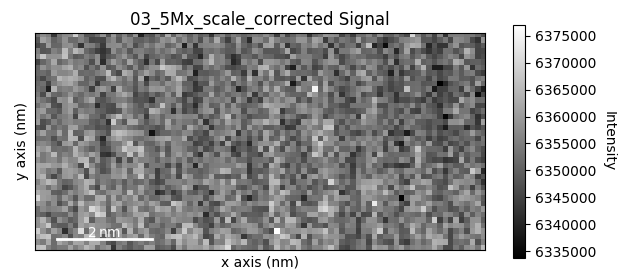

In [6]:
im = hs.load('examples/HRSTEM.dm3')
print(im)

# Slice by axis units and index:
im_crop = im.isig[1.0:10.5, 20:60]
print(im_crop)
im_crop.plot()

## <a id='io'></a> Getting your data in (and out) of HyperSpy

<a href="#top"><i class="fa-home fa" style="opacity:0.6;"></i></a>

Many data readers have been written for experimental tools:
<br/><br/>

<center><img src="img/formats.png" width=800px></center>

## Loading data is simple!

Example of Gatan's `dm3` format:

In [7]:
im = hs.load('examples/HRSTEM.dm3')

In [8]:
im

<Signal2D, title: 03_5Mx_scale_corrected, dimensions: (|512, 512)>

In [9]:
im.metadata

├── Acquisition_instrument
│   └── TEM
│       ├── acquisition_mode = STEM
│       ├── beam_current = 0.0
│       ├── beam_energy = 200.0
│       ├── camera_length = 20.0
│       ├── dwell_time = 0.00012989999389648437
│       ├── magnification = 5000000.0
│       └── microscope = JEOL COM
├── General
│   ├── date = 2016-05-07
│   ├── original_filename = HRSTEM.dm3
│   ├── time = 12:58:18
│   └── title = 03_5Mx_scale_corrected
└── Signal
    ├── Noise_properties
    │   └── Variance_linear_model
    │       ├── gain_factor = 1.0
    │       └── gain_offset = 0.0
    ├── binned = False
    ├── quantity = Intensity
    └── signal_type = 

Original metadata is maintained:

In [10]:
im.original_metadata

├── ApplicationBounds = (0, 0, 984, 1920)
├── DocumentObjectList
│   └── TagGroup0
│       ├── AnnotationGroupList
│       │   └── TagGroup0
│       │       ├── AnnotationType = 31
│       │       ├── BackgroundColor = (0, 0, 0)
│       │       ├── BackgroundMode = 2
│       │       ├── FillMode = 2
│       │       ├── Font
│       │       │   ├── Attributes = 0
│       │       │   ├── FamilyName = Microsoft Sans Serif
│       │       │   └── Size = 7
│       │       ├── ForegroundColor = (-1, -1, -1)
│       │       ├── HasBackground = 0
│       │       ├── IsMoveable = 1
│       │       ├── IsResizable = 1
│       │       ├── IsSelectable = 1
│       │       ├── IsTranslatable = 1
│       │       ├── IsVisible = 1
│       │       ├── ObjectTags
│       │       ├── Rectangle = (482.0, 16.0, 496.0, 142.0)
│       │       ├── TextOffsetH = 1.0
│       │       ├── TextOffsetV = 1.0
│       │       ├── TextWidth = 35.0
│       │       └── UniqueID = 19
│       ├── AnnotationType = 20
│   

Plotting is also simple within the notebook:

<IPython.core.display.Javascript object>


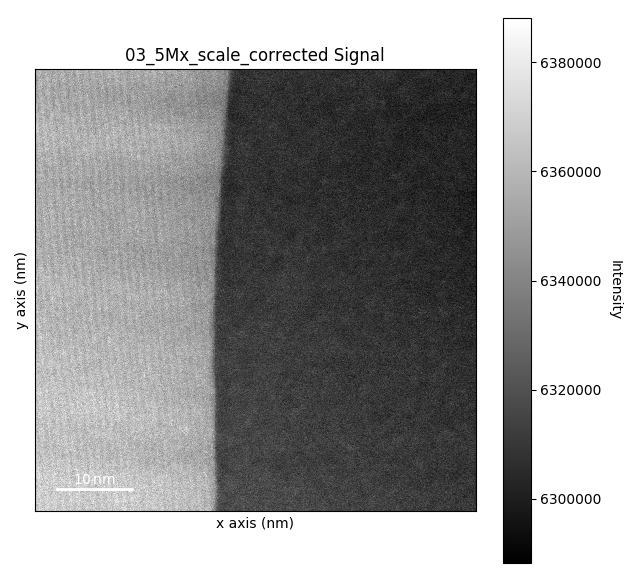

In [11]:
im.plot()

### EDAX EDS mapping data

In [12]:
s = hs.load('examples/SEM_EDS_map.spd')

In [13]:
s

<EDSSEMSpectrum, title: EDS Spectrum Image, dimensions: (256, 231|2000)>

In [14]:
s.axes_manager

<Axes manager, axes: (256, 231|2000)>
            Name |   size |  index |  offset |   scale |  units 
================ | ====== | ====== | ======= | ======= | ====== 
               x |    256 |      0 |       0 |   0.024 | $\mu m$ 
               y |    231 |      0 |       0 |   0.023 | $\mu m$ 
---------------- | ------ | ------ | ------- | ------- | ------ 
          Energy |   2000 |        |       0 |   0.005 |    keV

<IPython.core.display.Javascript object>


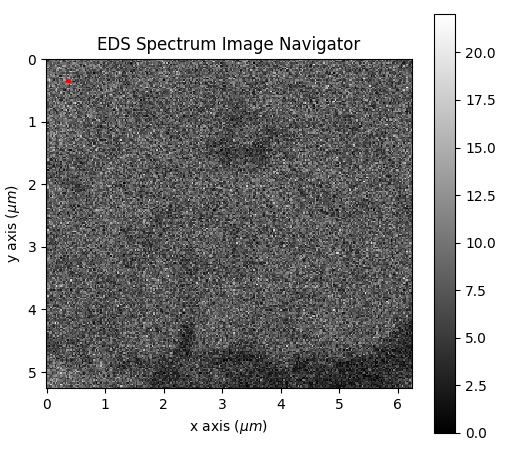

<IPython.core.display.Javascript object>


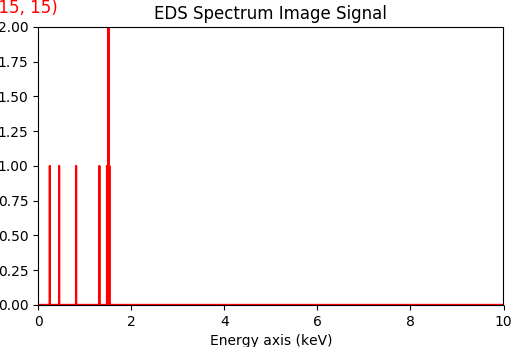

In [15]:
s.plot()

<IPython.core.display.Javascript object>


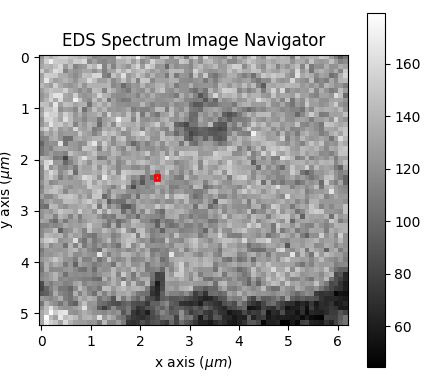

<IPython.core.display.Javascript object>


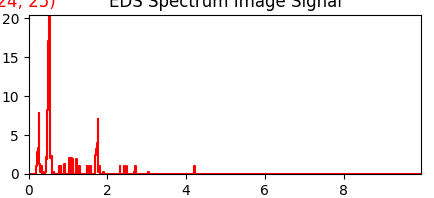

In [16]:
sbin = s.rebin(new_shape=[64, 56, 500])
sbin.plot()

## Generic data access

* A `Signal` can be created from any data that can be expressed as a `numpy` array

* If your tool can output raw data, it can be loaded into HyperSpy with little fuss

* Using general Python features, data from other sources can be loaded easily as well

### Loading a `.csv` spectrum file

In [ ]:
# Create a csv example:
single_pix = hs.load('examples/signal_separation_EELS_SI.hdf5').inav[0,0]
x_data = single_pix.axes_manager[0].axis
y_data = single_pix.data
data = np.stack([x_data, y_data])
np.savetxt("examples/spectrum.csv", data.T, delimiter=",", header="Energy (eV), Counts")

In [17]:
# Print the first few lines of the .csv file for inspection:
with open('examples/spectrum.csv', 'r') as f:
    for i in range(10):
        print(f.readline(), end='')

# Energy (eV), Counts
9.000000134110450745e+01,1.090600000000000000e+04
9.020000134408473969e+01,1.090400000000000000e+04
9.040000134706497192e+01,1.069800000000000000e+04
9.060000135004520416e+01,1.044400000000000000e+04
9.080000135302543640e+01,1.038000000000000000e+04
9.100000135600566864e+01,1.030400000000000000e+04
9.120000135898590088e+01,1.019400000000000000e+04
9.140000136196613312e+01,1.022700000000000000e+04
9.160000136494636536e+01,1.006700000000000000e+04


In [18]:
# Load the data into a numpy array from the .csv file:
d = np.loadtxt("examples/spectrum.csv", delimiter=',')

# Create a signal from the second column of data (the spectral counts)
s = hs.signals.Signal1D(d[:,1])
s

<Signal1D, title: , dimensions: (|2041)>

In [19]:
# Take the first column of values and set the energy axis accordingly:
energy_data = d[:,0]
s.axes_manager[0].scale = np.diff(energy_data).mean()
s.axes_manager[0].units = 'eV'
s.axes_manager[0].offset = energy_data[0]
s.axes_manager[0].name = 'Energy'
s.axes_manager

Signal axis name,size,offset,scale,units
Energy,2041,90.00000134110451,0.20000000298023224,eV


<IPython.core.display.Javascript object>


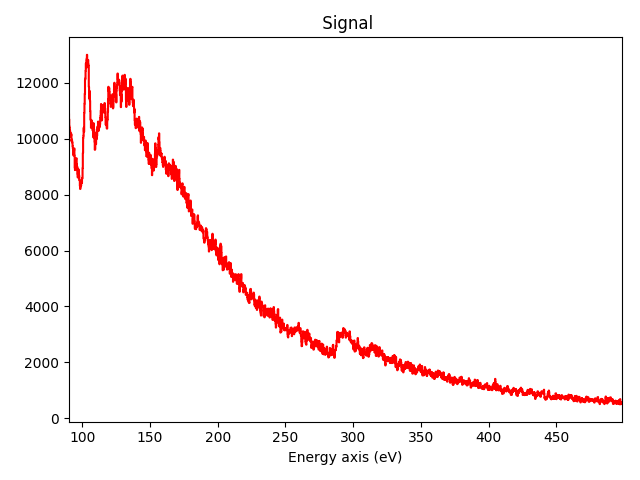

In [21]:
s.plot()

### Loading and saving MATLAB files 

The SciPy project provides a Matlab reader and saver that makes this easy:

In [22]:
from scipy.io import loadmat, savemat
house = loadmat('examples/house_image.mat')
print(house['__header__'])

b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Mon Sep 11 14:27:46 2017'


In [23]:
s = hs.signals.Signal2D(house['IMin0'])
print(s.metadata)
s.axes_manager

├── General
│   └── title = 
└── Signal
    ├── binned = False
    └── signal_type = 



Signal axis name,size,offset,scale,units
,256,0.0,1.0,
,256,0.0,1.0,


<IPython.core.display.Javascript object>


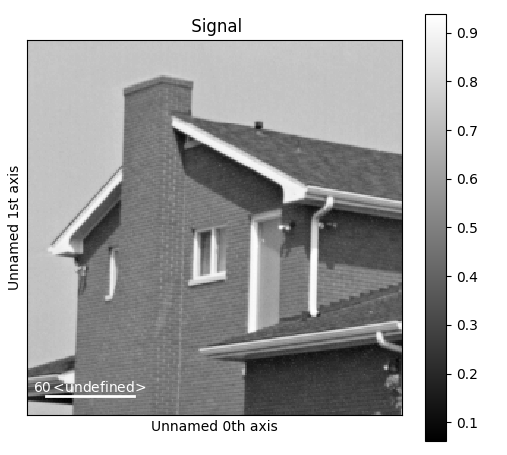

In [24]:
s.plot()

## "Lazy" signal access

* HyperSpy makes it easy to work with big data (bigger than your system's memory)

* Uses the excellent [`dask`](https://dask.pydata.org/en/latest/) library for chunking operations

* Almost all the regular features of HyperSpy can operate on "lazy" signals (see [User Guide](http://hyperspy.org/hyperspy-doc/current/user_guide/big_data.html))

Comparison with normal loading:

In [25]:
# Load the EDS map lazily:
s = hs.load('examples/SEM_EDS_map.spd', lazy=True)
print(type(s.data))

<class 'dask.array.core.Array'>


In [26]:
# Print some statistics about memory usage
print("Full dataset should consume:", s.data.nbytes / 1e6, 'MB')
print("Chunk sizes are:", s.data.chunks)
one_chunk = s.data[:s.data.chunks[0][0], :s.data.chunks[1][0],:s.data.chunks[2][0]]
print("Memory use from one chunk: ", one_chunk.nbytes / 1e6, "MB")

Full dataset should consume: 236.544 MB
Chunk sizes are: ((77, 77, 77), (128, 128), (2000,))
Memory use from one chunk:  39.424 MB


## Saving data from HyperSpy &mdash; HDF5

* The default format for HyperSpy data is an `.hspy` file in [HDF5](https://portal.hdfgroup.org/display/HDF5/HDF5) format

* Open, hierarchical data format supporting compression and full read/write capability

* All HyperSpy signals can be saved as `.hspy` files

* Saves full metadata about signal, including critical processing parameters
  * Modeling, signal separation, elemental information

## Saving data from HyperSpy &mdash; data interchange

* Other formats can be easily written:
  * Single spectra &mdash; `.msa` format
  * Images &mdash; TIFF, JPG, etc.
  * Spectrum images &mdash; Lispix-style `.rpl`/`.raw` pairs

## <a id='EM'></a> Electron microscopy-specific tools

<a href="#top"><i class="fa-home fa" style="opacity:0.6;"></i></a>

* HyperSpy is incredibly flexible, but was developed from a microscopy perspective

* Has in-depth features related to image, EDS, and EELS processing
  * Many of the tools are applicable to multiple modalities

* Some other EM tools available:
    * Dielectric function analysis (for plasmon EELS)
    * Electron holography
    * "Extension" projects that build upon HyperSpy (like Andy's `tomotools`)

* Provides a robust framework on which to develop new processing pipelines

## <a id='EDS'></a> EDS Processing

<a href="#top"><i class="fa-home fa" style="opacity:0.6;"></i></a>

* EDS support is implemented as `EDSSpectrum`, a subclass of `Signal` for EDS-specific features

* Open metadata structure holds relevant info about instrument and detectors:

In [27]:
s = hs.datasets.example_signals.EDS_TEM_Spectrum()
s.metadata.Acquisition_instrument.TEM.Detector

└── EDS
    ├── azimuth_angle = 0.0
    ├── detector = Super-X 4 detectors Brucker
    ├── elevation_angle = 22.0
    └── energy_resolution_MnKa = 133.312296

* Also holds all the compositional information:

In [28]:
print(s.metadata.Sample.elements)

# Elements can be added easily:
s.add_elements(['Cu'])
print(s.metadata.Sample.elements)

['Fe' 'Pt']
['Cu', 'Fe', 'Pt']


### Processing tools

* All the "basic" EDS processing tools are included:
    * Background removal
    * Net intensity line map extraction
    * Quantification using Cliff-Lorimer (k-factors), $\zeta$-factors, and ionization cross sections

* Can also use the general HyperSpy tools for more advanced analysis:
    * Curve fitting
    * Machine learning
        * Factor reduction
        * Signal separation ("phase mapping")

* Look to the extensive documentation in the [User Guide](http://hyperspy.org/hyperspy-doc/current/user_guide/eds.html) and [Tutorials](https://github.com/hyperspy/hyperspy-demos/tree/master/electron_microscopy/EDS) for help

## <a id='EELS'></a> EELS Processing

<a href="#top"><i class="fa-home fa" style="opacity:0.6;"></i></a>

* EELS is a "first-class citizen" &mdash; software was originally called "EELSLab"

* EELS support is implemented as `EELSSpectrum`, a subclass of `Signal` for EELS-specific features

* Like EDS, open metadata structure holds relevant info about instrument and detectors:

In [29]:
s = hs.load('examples/signal_separation_EELS_SI.hdf5')
s.metadata.Acquisition_instrument

└── TEM
    ├── Detector
    │   └── EELS
    │       └── collection_angle = 20.829999923706055
    ├── beam_energy = 200.0
    ├── convergence_angle = 12.0
    └── dwell_time = 0.20000000000000001

### Processing tools

* Almost all of Egerton's EELS methods are built in:
    * Core-loss background subtraction
    * Estimating thickness
    * Low-loss deconvolution
    * Estimating elastic scattering threshold
    * Kramers-Kronig analysis

* Can also use the general HyperSpy tools for more advanced analysis:
    * Curve fitting
    * Machine learning
        * Factor reduction
        * Signal separation ("phase mapping")

* Look to the extensive documentation in the [User Guide](http://hyperspy.org/hyperspy-doc/current/user_guide/eels.html) and [Tutorials](https://github.com/hyperspy/hyperspy-demos/tree/master/electron_microscopy/EELS) for help

## <a id='extending'></a> Extensibility of HyperSpy

<a href="#top"><i class="fa-home fa" style="opacity:0.6;"></i></a>

* For most, HyperSpy already does everything a microscopist might need

* Open framework means if it doesn't, you can make it so!

* Some examples:
    * Andy's `tomotools`
    * [pyXem](https://github.com/pyxem/pyxem/) &mdash; Pythonic Crystallographic Electron Microscopy
    * [Atomap](http://atomap.org/) &mdash; Quantifying atomic columns in ADF STEM images
    * [fpd_data_processing](https://fast_pixelated_detectors.gitlab.io/fpd_data_processing/) &mdash; Fast Pixelated Detector processing

# <a id='demos'></a> Interactive demos

<a href="#top"><i class="fa-home fa" style="opacity:0.6;"></i></a>

* [Curve fitting](EELS%20Curve%20Fitting.ipynb) (and it's application to EELS spectrum images)

* [Processing TEM EDS data](TEM_EDS_nanoparticles.ipynb) (including source separation)

* Extensibility (Andy's `tomotools` package)